In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, binom, poisson
import scipy.stats as stats


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Histogram -> p.d.f.

/tmp/ipykernel_370275/182887586.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color='r')
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS', 'StayPuft'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS', 'StayPuft'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS', 'StayPuft'] not found. Falling back to DejaVu Sans.


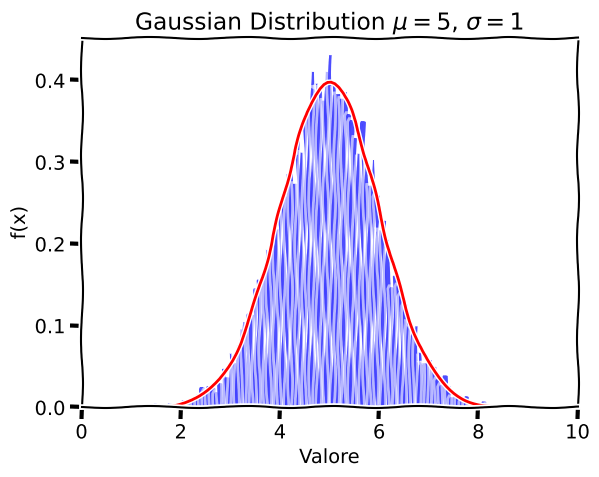

In [2]:
# Genera dati con distribuzione gaussiana
mu, sigma = 5, 1
N = 10000
bins = 100
dens = True
fit = True

data = np.random.normal(mu, sigma, N)

# Imposta lo stile "comic"
with plt.xkcd():

    # Crea l'istogramma
    count, b, ignored = plt.hist(data, bins=bins, density=dens, alpha=0.6, color='b')

    # if fit:
    # Sovrapponi la linea della distribuzione gaussiana
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, sigma)
    plt.plot(x, p, 'k', linewidth=2, color='r')

    bin_width = b[1] - b[0] 
    # Titoli e etichette
    title = f"Gaussian Distribution $\mu={mu}$, $\sigma={sigma}$"
    plt.title(title)
    plt.xlabel('Valore')

    if norm:
        plt.ylabel('f(x)')
    else:
        plt.ylabel('N(x)')

    plt.xlim(0, 10)

    # Mostra il grafico
    plt.show()

## Gaussian

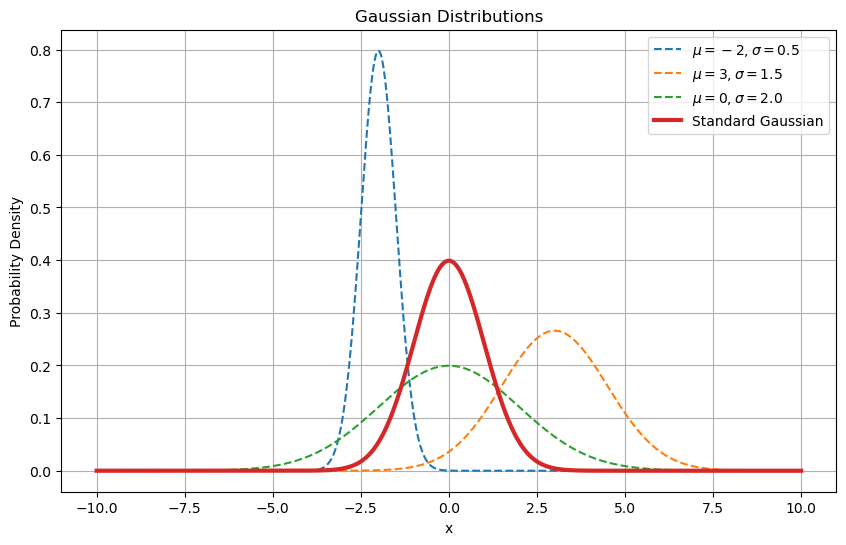

In [3]:
# Funzione per generare la distribuzione gaussiana
def gaussian(x, mu, sigma):
    return (1/(sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Intervallo di valori per x
x = np.linspace(-10, 10, 1000)

# Parametri per le gaussiane
params = [
    {'mu': -2, 'sigma': 0.5},
    {'mu': 3, 'sigma': 1.5},
    {'mu': 0, 'sigma': 2.0}
]

# Disegno delle gaussiane
plt.figure(figsize=(10, 6))

for param in params:
    y = gaussian(x, param['mu'], param['sigma'])
    plt.plot(x, y, label=f"$\mu={param['mu']}, \sigma={param['sigma']}$", linestyle='--')

# Aggiunta della gaussiana standard
standard_mu = 0
standard_sigma = 1
y_standard = gaussian(x, standard_mu, standard_sigma)
plt.plot(x, y_standard, label="Standard Gaussian", lw=3)

# Configurazione del grafico
plt.title("Gaussian Distributions")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.show()


### Gaussian and Central Limit Theorem

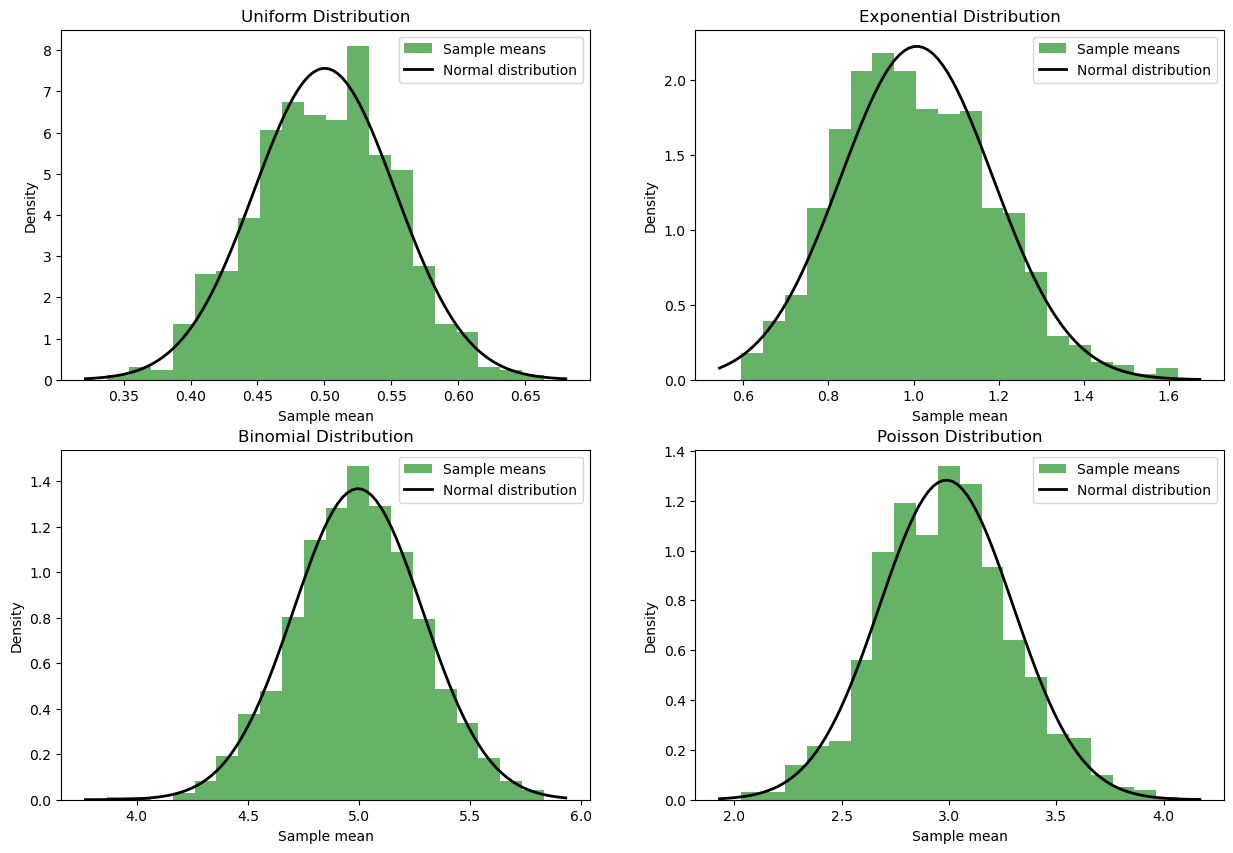

In [4]:

# Funzione per generare campioni e calcolare le medie campionarie
def generate_sample_means(distribution_func, sample_size, num_samples):
    samples = distribution_func(size=(num_samples, sample_size))
    sample_means = np.mean(samples, axis=1)
    return sample_means

# Parametri
num_samples = 1000  # Numero di campioni per ciascuna somma
sample_size = 30  # Numero di variabili casuali per ciascuna somma
num_bins = 20  # Numero di bin per l'istogramma

# Distribuzioni
distributions = {
    'Uniform': lambda size: np.random.uniform(low=0, high=1, size=size),
    'Exponential': lambda size: np.random.exponential(scale=1.0, size=size),
    'Binomial': lambda size: np.random.binomial(n=10, p=0.5, size=size),
    'Poisson': lambda size: np.random.poisson(lam=3.0, size=size)
}

# Plot delle distribuzioni
plt.figure(figsize=(15, 10))

all_sample_means = []

for i, (name, distribution_func) in enumerate(distributions.items(), 1):
    plt.subplot(2, 2, i)
    
    sample_means = generate_sample_means(distribution_func, sample_size, num_samples)
    all_sample_means.extend(sample_means)
    
    # Istogramma delle medie campionarie
    plt.hist(sample_means, bins=num_bins, density=True, alpha=0.6, color='g', label='Sample means')
    
    # Calcolo dei parametri della distribuzione normale
    mu = np.mean(sample_means)
    sigma = np.std(sample_means)
    
    # Disegna la distribuzione normale teorica
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, p, 'k', linewidth=2, label='Normal distribution')
    
    # Configurazione del grafico
    plt.title(f"{name} Distribution")
    plt.xlabel('Sample mean')
    plt.ylabel('Density')
    plt.legend()

## Binomial

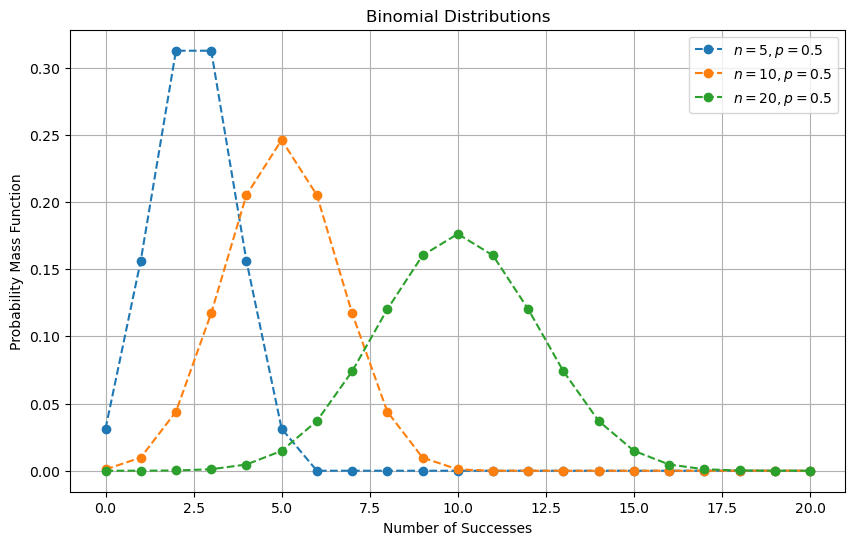

In [5]:
# Intervallo di valori per x (numero di successi)
x = np.arange(0, 21)

# Parametri per le distribuzioni binomiali
params = [
    {'n': 5, 'p': 0.5},
    {'n': 10, 'p': 0.5},
    {'n': 20, 'p': 0.5}
]

# Disegno delle distribuzioni binomiali
plt.figure(figsize=(10, 6))

for param in params:
    y = binom.pmf(x, param['n'], param['p'])
    plt.plot(x, y, label=f"$n={param['n']}, p={param['p']}$", linestyle='--', marker='o')


# Configurazione del grafico
plt.title("Binomial Distributions")
plt.xlabel("Number of Successes")
plt.ylabel("Probability Mass Function")
plt.legend()
plt.grid(True)

# Mostra il grafico
plt.show()


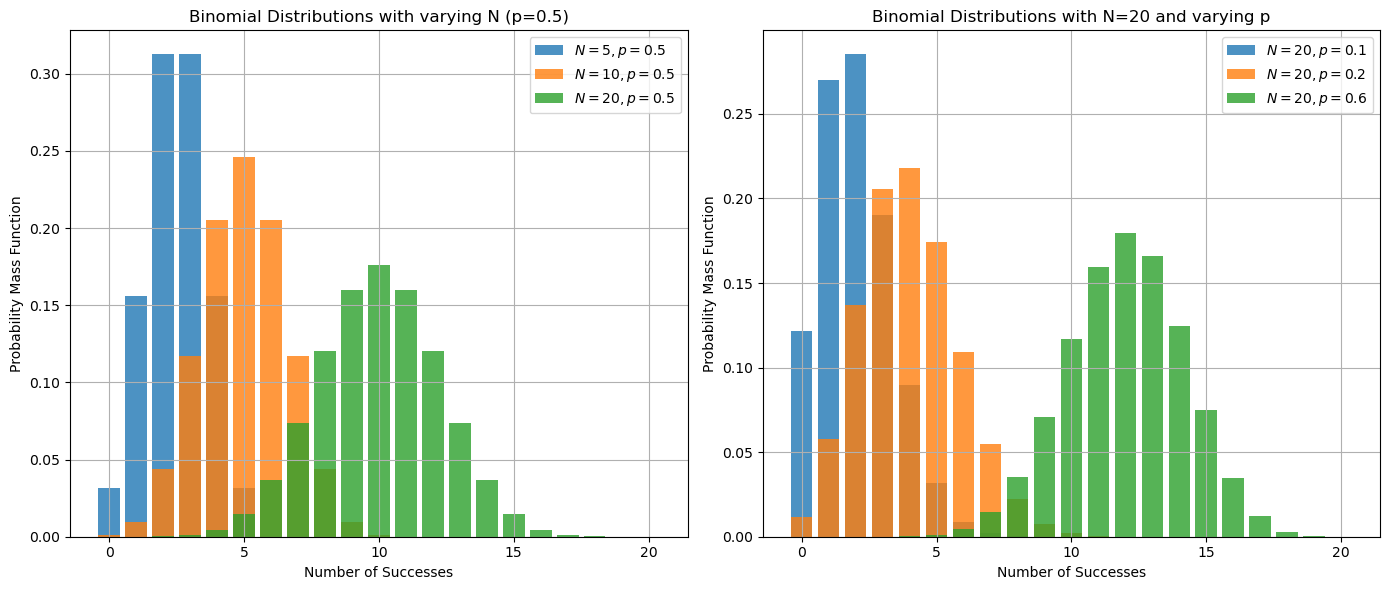

In [6]:
# Intervallo di valori per x (numero di successi)
x = np.arange(0, 21)

# Parametri per le distribuzioni binomiali
params_1 = [
    {'n': 5, 'p': 0.5},
    {'n': 10, 'p': 0.5},
    {'n': 20, 'p': 0.5}
]

params_2 = [
    {'n': 20, 'p': 0.1},
    {'n': 20, 'p': 0.2},
    {'n': 20, 'p': 0.6}
]

# Creazione della figura e dei subplot
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Disegno delle distribuzioni binomiali come istogrammi per il primo set di parametri
for param in params_1:
    y = binom.pmf(x, param['n'], param['p'])
    axs[0].bar(x, y, alpha=0.8, label=f"$N={param['n']}, p={param['p']}$")

# Configurazione del primo grafico
axs[0].set_title("Binomial Distributions with varying N (p=0.5)")
axs[0].set_xlabel("Number of Successes")
axs[0].set_ylabel("Probability Mass Function")
axs[0].legend()
axs[0].grid(True)

# Disegno delle distribuzioni binomiali come istogrammi per il secondo set di parametri
for param in params_2:
    y = binom.pmf(x, param['n'], param['p'])
    axs[1].bar(x, y, alpha=0.8, label=f"$N={param['n']}, p={param['p']}$")

# Configurazione del secondo grafico
axs[1].set_title("Binomial Distributions with N=20 and varying p")
axs[1].set_xlabel("Number of Successes")
axs[1].set_ylabel("Probability Mass Function")
axs[1].legend()
axs[1].grid(True)

# Mostra il grafico
plt.tight_layout()
plt.show()


## Poisson

/tmp/ipykernel_370275/1158128239.py:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  return (lambda_**k * np.exp(-lambda_)) / np.math.factorial(k)


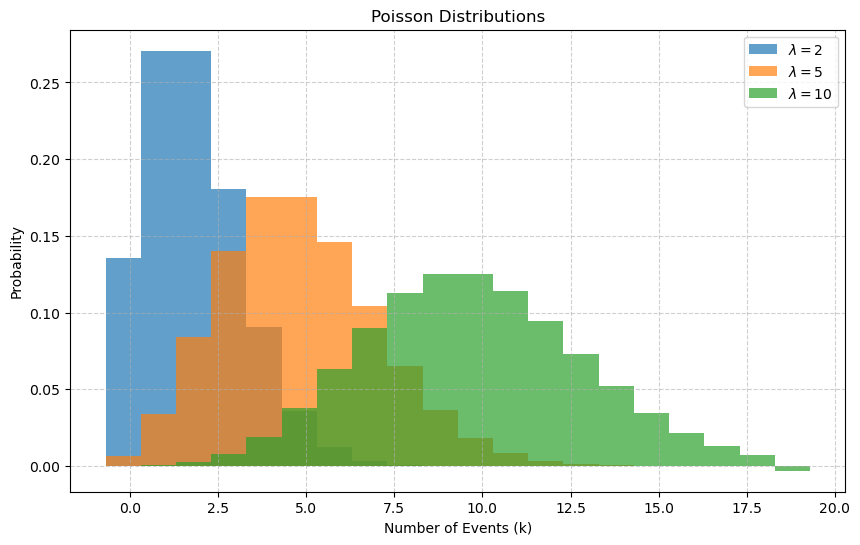

In [7]:
# Funzione per generare la distribuzione di Poisson
def poisson(k, lambda_):
    return (lambda_**k * np.exp(-lambda_)) / np.math.factorial(k)

# Intervallo di valori per k (numero di eventi)
k = np.arange(0, 20)

# Parametri per le distribuzioni di Poisson
params = [
    {'lambda_': 2},
    {'lambda_': 5},
    {'lambda_': 10}
]

# Disegno delle distribuzioni di Poisson
plt.figure(figsize=(10, 6))

for param in params:
    y = [poisson(x, param['lambda_']) for x in k]
    plt.bar(k - 0.2, y, width=1, label=f"$\lambda={param['lambda_']}$", alpha=0.7)

# Configurazione del grafico
plt.title("Poisson Distributions")
plt.xlabel("Number of Events (k)")
plt.ylabel("Probability")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostra il grafico
plt.show()
